# Práctica 2
En esta práctica buscamos desarrollar un proyecto de Ciencia de Datos inicial para hacernos a la idea de las librerías que usaremos más adelante.

Para ello cargaremos librerías que necesitaremos en nuestro caso antes de comenzar con nuestro proyecto.

In [12]:
import pandas as pd
import sqlite3
import os
import pathlib as path

Los datos que usaremos provienen del portal de datasets del ayuntamiento de Valencia: https://valencia.opendatasoft.com/pages/home/, sobre el uso de las bicicletas.

Para ello descargaremos el dataset que en nuestro caso estará dentro de la carpeta data/raw.

In [13]:
# Creamos la ruta al archivo
# os.chdir("./../")  # --- USAR SOLO DOS VECES
ruta = os.getcwd()  # Devuelve la ruta actual 
# print(ruta)
archivo = "/data/raw/usobici_raw.csv"
ruta_archivo = path.Path(ruta + archivo)  # Añade a la ruta la ruta del archivo

# Comprobamos si se ha encontrado el archivo y se avisa a usuario
if os.path.exists(ruta_archivo):
    df = pd.read_csv(ruta_archivo)  # Creación de DataFrame
    print("Archivo leido")
else:
    print("Archivo no encontrado")

Archivo leido


In [14]:
print(df)

                         updated                  address  number  available  \
0     2025-02-03 00:01:42.000000  Alameda - Pintor Maella      53         23   
1     2025-02-03 00:09:53.000000  Alameda - Pintor Maella      53         25   
2     2025-02-03 00:20:14.000000  Alameda - Pintor Maella      53         23   
3     2025-02-03 00:30:36.000000  Alameda - Pintor Maella      53         23   
4     2025-02-03 00:39:44.000000  Alameda - Pintor Maella      53         23   
...                          ...                      ...     ...        ...   
4063  2025-03-03 14:39:32.000000  Alameda - Pintor Maella      53         24   
4064  2025-03-03 14:49:38.000000  Alameda - Pintor Maella      53         24   
4065  2025-03-03 15:00:44.000000  Alameda - Pintor Maella      53         24   
4066  2025-03-03 15:09:50.000000  Alameda - Pintor Maella      53         23   
4067  2025-03-03 15:19:57.000000  Alameda - Pintor Maella      53         23   

            lat       lon  total open  

Gracias a Pandas podemos realizar ciertas acciones preliminares rápidas que nos permiten determinar ciertas características generales de los datos:

In [15]:
df.shape  # Devuelve el tamaño de la tabla en una tupla

(4068, 9)

In [16]:
df.describe(include="all")  # Nos da información básica sobre las columnas del dataset

,updated,address,number,available,lat,lon,total,open,free
count,4068,4068,4068.0,4068.000000,4.068000e+03,4.068000e+03,4068.0,4068,4068.000000
unique,4068,1,NaN,NaN,NaN,NaN,NaN,1,NaN
top,2025-03-03 15:19:57.000000,Alameda - Pintor Maella,NaN,NaN,NaN,NaN,NaN,T,NaN
freq,1,4068,NaN,NaN,NaN,NaN,NaN,4068,NaN
mean,NaN,NaN,53.0,17.118240,3.945676e+01,-3.481393e-01,25.0,NaN,7.855457
std,NaN,NaN,0.0,7.428375,7.106301e-15,5.551798e-17,0.0,NaN,7.442906
min,NaN,NaN,53.0,0.000000,3.945676e+01,-3.481393e-01,25.0,NaN,0.000000
25%,NaN,NaN,53.0,11.000000,3.945676e+01,-3.481393e-01,25.0,NaN,2.000000
50%,NaN,NaN,53.0,20.000000,3.945676e+01,-3.481393e-01,25.0,NaN,5.000000
75%,NaN,NaN,53.0,23.000000,3.945676e+01,-3.481393e-01,25.0,NaN,14.000000


In [18]:
df.dtypes # Devuelve el tipo de los valores del dataset

updated       object
address       object
number         int64
available      int64
lat          float64
lon          float64
total          int64
open          object
free           int64
dtype: object

Cuando tenemos datos de tipo fecha, muchas veces estos estan en formato string, lo cual no nos permite usarlos para realizar gráficos o cálculos. Pandas nos permite modificarlos a un formato de fecha llamado DateTime.

In [21]:
df["updated"] = pd.to_datetime(df.updated) # Conversión de la columna a fecha

# Con esto, obtendremos el rango temporal de la fecha (fecha minima - fecha máxima)
print(df["updated"].min(), "+++", df["updated"].max())

2025-02-03 00:01:42 +++ 2025-03-03 15:19:57


Podemos obtener los valores únicos que tenga una columna usando el método unique():

In [28]:
print(df["address"].unique()) 

['Alameda - Pintor Maella']


                 updated                  address  number  available  \
0    2025-02-03 00:01:42  Alameda - Pintor Maella      53         23   
1    2025-02-03 00:09:53  Alameda - Pintor Maella      53         25   
2    2025-02-03 00:20:14  Alameda - Pintor Maella      53         23   
3    2025-02-03 00:30:36  Alameda - Pintor Maella      53         23   
4    2025-02-03 00:39:44  Alameda - Pintor Maella      53         23   
...                  ...                      ...     ...        ...   
4063 2025-03-03 14:39:32  Alameda - Pintor Maella      53         24   
4064 2025-03-03 14:49:38  Alameda - Pintor Maella      53         24   
4065 2025-03-03 15:00:44  Alameda - Pintor Maella      53         24   
4066 2025-03-03 15:09:50  Alameda - Pintor Maella      53         23   
4067 2025-03-03 15:19:57  Alameda - Pintor Maella      53         23   

            lat       lon  total open  free  
0     39.456764 -0.348139     25    T     2  
1     39.456764 -0.348139     25    T     0

<Axes: xlabel='available', ylabel='Count'>

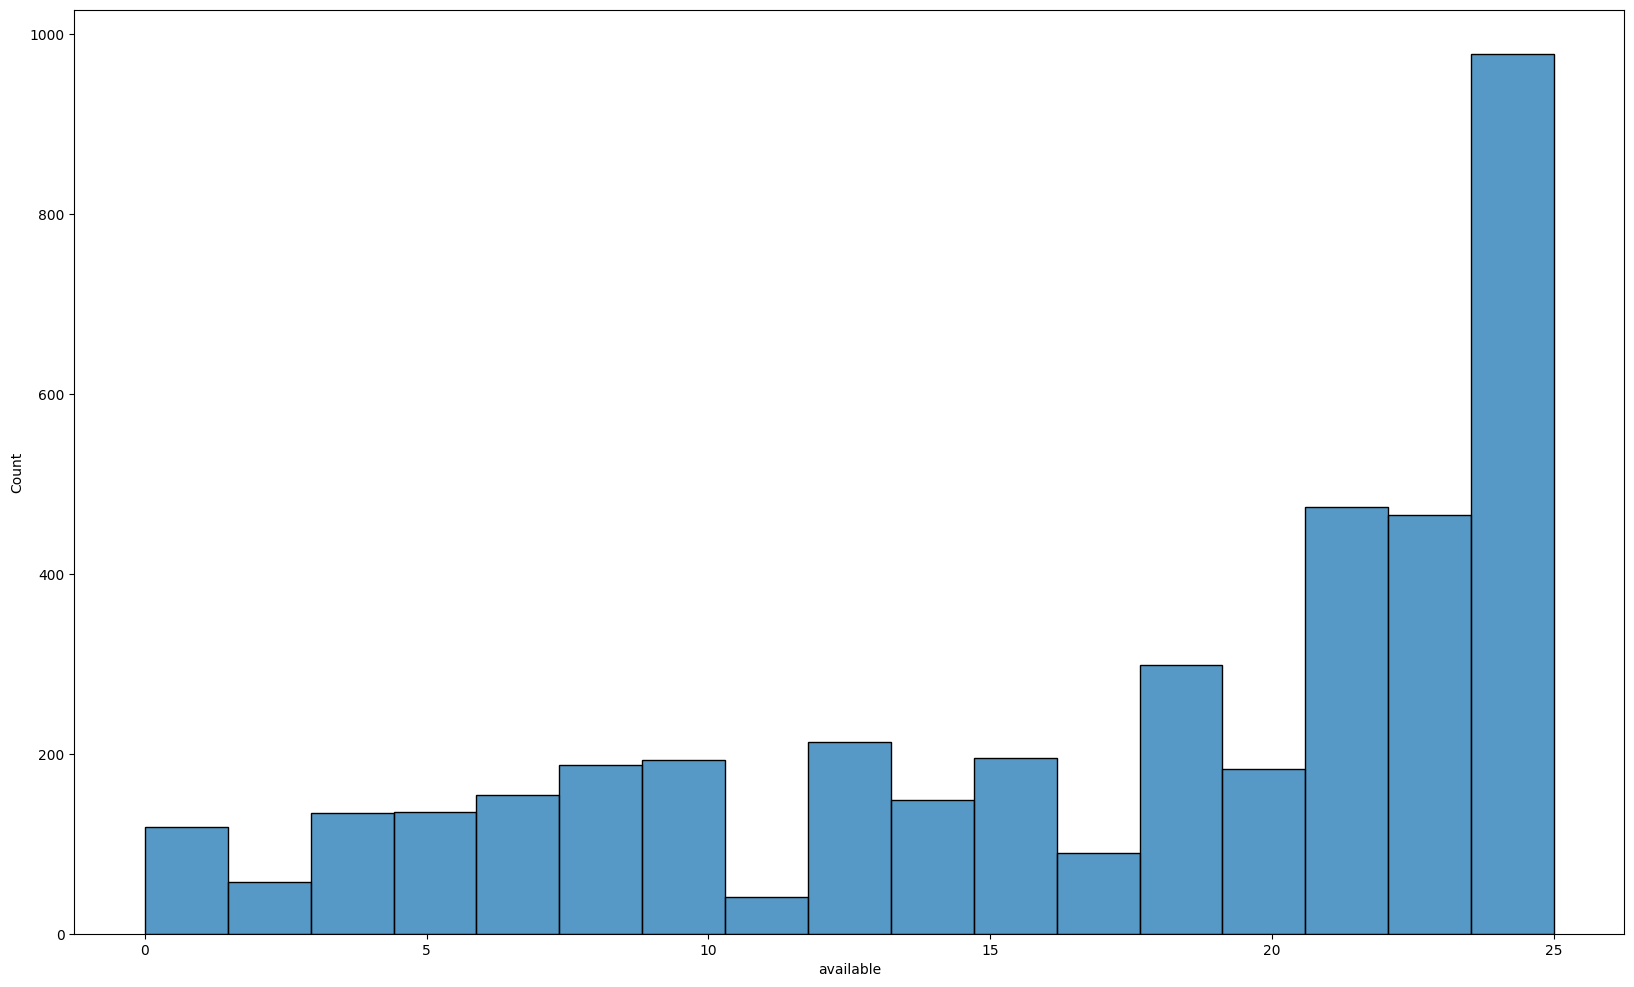

In [51]:
# Importaremos seaborn para gráficos
import seaborn as sns
import matplotlib.pyplot as plt
# Imprimiremos la tabla para ver los datos
print(df)

plt.figure(figsize=(20,12))
sns.histplot(data=df, x="available", bins="fd")